## 1. Installing libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go, plotly.express as px
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
from collections import Counter

In [2]:
# Ignoring warnings for cleaner output logs
import warnings
warnings.filterwarnings('ignore')

## 2. Data Preparation

In [3]:
# Original dataset URL provided by DAZONE host
url = 'https://drive.google.com/file/d/1_y7RCkkWUiCRRCGmAPzlX8-7QDmIx5Uy/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [4]:
# Read file from path
raw_df = pd.read_csv(path)

### Raw dataset statistics

In [5]:
raw_df.tail()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
3064,2801,1990.0,Basic,20425.0,29-10-2021,5.0,5.0,14.0,5.0,3.0,...,0.0,0.0,Other,8.414996e+10,NaN,2021.0,10.0,7.0,Married_1,Online
3065,8551,1990.0,PhD,65295.0,23-12-2022,19.0,366.0,34.0,117.0,34.0,...,0.0,0.0,Female,NaN,8.409877e+10,2022.0,12.0,20.0,Single_0,Cash
3066,7831,1998.0,Graduation,31632.0,14-07-2022,92.0,18.0,10.0,12.0,11.0,...,0.0,0.0,Female,8.431896e+10,NaN,2022.0,7.0,6.0,Single_0,NaN
3067,6426,1994.0,Master,61794.0,14-09-2022,74.0,265.0,49.0,188.0,54.0,...,0.0,0.0,Male,8.452917e+10,NaN,2022.0,NaN,20.0,Married_1,Mobile
3068,4950,1983.0,NaN,75437.0,09-11-2022,25.0,796.0,2.0,545.0,95.0,...,0.0,0.0,Female,NaN,8.415671e+10,2022.0,NaN,NaN,Together_0,NaN


In [6]:
raw_df.describe()

,ID,Year_Of_Birth,Income,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,...,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase
count,3069.000000,2832.000000,2782.000000,2804.000000,2807.000000,2810.000000,2806.000000,2813.000000,2840.000000,2792.000000,...,2815.000000,2801.000000,2834.000000,2826.000000,2813.000000,1.561000e+03,1.257000e+03,2084.000000,2100.000000,2833.000000
mean,5496.270446,1987.882768,52489.802301,48.917974,310.807268,28.201779,169.133286,37.570921,27.107746,44.102077,...,-0.641918,0.014638,0.066690,0.014508,0.009243,8.450269e+10,8.449625e+10,2022.020154,6.502381,14.976350
std,2600.610175,4.914424,24436.779418,29.081314,337.387542,39.777338,225.993668,54.811137,41.021721,52.125108,...,0.538184,0.120119,0.249529,0.119594,0.095711,2.831282e+08,2.821344e+08,0.686316,3.485558,7.617011
min,1001.000000,1975.000000,1730.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.400005e+10,8.400247e+10,2021.000000,1.000000,0.000000
25%,3251.000000,1985.000000,35790.250000,24.000000,27.000000,3.000000,16.000000,3.000000,1.000000,9.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.425969e+10,8.425343e+10,2022.000000,3.000000,8.000000
50%,5555.000000,1988.000000,51844.500000,49.000000,184.000000,10.000000,69.000000,12.000000,9.000000,24.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.450524e+10,8.450120e+10,2022.000000,6.000000,15.000000
75%,7753.000000,1991.000000,68592.000000,74.000000,512.000000,34.000000,238.750000,49.000000,34.000000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.474783e+10,8.473833e+10,2022.000000,10.000000,21.000000
max,9997.000000,2002.000000,666666.000000,99.000000,1494.000000,201.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,8.499889e+10,8.499750e+10,2023.000000,12.000000,44.000000


In [7]:
num_col, num_row = raw_df.shape
print(f'This dataset has {num_row} rows and {num_col} columns.')

This dataset has 31 rows and 3069 columns.


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3069 non-null   int64  
 1   Year_Of_Birth          2832 non-null   float64
 2   Academic_Level         2799 non-null   object 
 3   Income                 2782 non-null   float64
 4   Registration_Time      2824 non-null   object 
 5   Recency                2804 non-null   float64
 6   Liquor                 2807 non-null   float64
 7   Vegetables             2810 non-null   float64
 8   Pork                   2806 non-null   float64
 9   Seafood                2813 non-null   float64
 10  Candy                  2840 non-null   float64
 11  Jewellery              2792 non-null   float64
 12  Num_Deals_Purchases    2841 non-null   float64
 13  Num_Web_Purchases      2823 non-null   float64
 14  Num_Catalog_Purchases  2811 non-null   float64
 15  Num_

## 3. Data Preprocessing

In this coding cell, I am developing a function to check necessary values to monitor the status of attribute variables (such as total rows, number of unique rows, number of null rows, percent of nulls in total of that attribute and data type) to further understand columns requiring preprocessing.

In [9]:
def value_check_and_sort(dataframe):
    dataframe_check = pd.DataFrame({
        'Count': dataframe.count(),
        'Unique': dataframe.nunique(),
        'Null': dataframe.isnull().sum(),
        '%Null': (dataframe.isnull().sum() / len(dataframe)) * 100,
        'DType': dataframe.dtypes.values
    })
    dataframe_check['%Null'] = dataframe_check['%Null'].map('{:.2f}%'.format)

    # Sort the rows by the '%Null' column in ascending order
    dataframe_check['%Null'] = dataframe_check['%Null'].str.rstrip('%').astype(float)
    dataframe_check_sorted = dataframe_check.sort_values(by='%Null')
    dataframe_check_sorted['%Null'] = dataframe_check_sorted['%Null'].map('{:.2f}%'.format)

    return dataframe_check_sorted

In [10]:
value_check_and_sort(raw_df)

,Count,Unique,Null,%Null,DType
ID,3069,2240,0,0.00%,int64
Num_Deals_Purchases,2841,15,228,7.43%,float64
Candy,2840,177,229,7.46%,float64
Promo_10,2834,2,235,7.66%,float64
Total_Purchase,2833,39,236,7.69%,float64
Year_Of_Birth,2832,28,237,7.72%,float64
Promo_20,2826,2,243,7.92%,float64
Promo_30,2826,2,243,7.92%,float64
Num_Store_Purchases,2826,14,243,7.92%,float64
Registration_Time,2824,663,245,7.98%,object


I noticed in the dataset provided the ID column, although defined as a primary key, has a discrepancy between the number of unique values and the count of values. This is illogical because each primary key should appear only once, indicating that there are duplicate ID values in this raw dataset.

### 3.1. Duplicate Removing

I also noticed that for the same customer ID, the number of observation rows can appear multiple times and contain many null attributes within the observation. However, these observation rows with null values compensate for each other (for example, if ID number 1017 is repeated 3 times but when the observation row with index 3000 of that ID has null values in the Liquor column, I can fill in the Liquor column values from the remaining 2 observation rows with indexes 16 and 1491 to replace it). Therefore, the team grouped these IDs and filled them according to the same rule. After that, the team will remove all duplicate rows existing in the dataframe.

In [11]:
# Grouping and filling null values
raw_df = raw_df.groupby('ID').apply(lambda group: group.ffill().bfill())

# Removing duplicate rows
raw_df = raw_df.drop_duplicates(subset='ID')
raw_df.shape

(2240, 31)

So the number of rows have reduced from 3069 columns in total to 2240. And the magic is...

In [12]:
value_check_and_sort(raw_df)

,Count,Unique,Null,%Null,DType
ID,2240,2240,0,0.00%,int64
Total_Purchase,2240,39,0,0.00%,float64
Gender,2240,3,0,0.00%,object
Complain,2240,2,0,0.00%,float64
Promo_20,2240,2,0,0.00%,float64
Promo_10,2240,2,0,0.00%,float64
Promo_50,2240,2,0,0.00%,float64
Promo_40,2240,3,0,0.00%,float64
Promo_30,2240,2,0,0.00%,float64
Num_Web_Visits_Month,2240,16,0,0.00%,float64


The number of attribute that contained null value decreased from 30 columns to only 6 columns. In order to understand easier, we using plotly to draw some interactable charts.

In [13]:
# Creating new dataframe for visualizing purposes
null_df1 = value_check_and_sort(raw_df)

# Removing rows with %Null value equal to 0
null_df1 = null_df1[null_df1['%Null'] != '0.00%']
null_df1

,Count,Unique,Null,%Null,DType
Income,2216,1974,24,1.07%,float64
Payment_Method,1794,4,446,19.91%,object
Month_Register,1667,12,573,25.58%,float64
Year_Register,1660,3,580,25.89%,float64
Phone,1240,1240,1000,44.64%,float64
Phone_Number,1000,1000,1240,55.36%,float64


### 3.2 Null Cleaning

In [14]:
# Combine these two columns and delete one of them
raw_df['Phone'] = raw_df['Phone'].combine_first(raw_df['Phone_Number'])
raw_df.drop(columns=['Phone_Number'], inplace=True)

This code block converts the `Register_Time` to datetime format and then fills missing values in `Month_Register` and `Year_Register` columns based on the respective month and year from the main datetime column.

In [15]:
# Processing the 'Register_Time' column with Year and Month
raw_df['Registration_Time'] = pd.to_datetime(raw_df['Registration_Time'], errors='coerce')
raw_df['Month_Register'] = raw_df['Month_Register'].fillna(raw_df['Registration_Time'].dt.month)
raw_df['Year_Register'] = raw_df['Year_Register'].fillna(raw_df['Registration_Time'].dt.year)

Handling null values of Payment_Method:

* If 'Num_Web_Purchases' > 'Num_Store_Purchases' then it is an Online payment method.
* Otherwise, it is Cash payment method.

In [16]:
# Count number of rows of each values in the 'Payment_Method' column
raw_df['Payment_Method'].value_counts()

Payment_Method
Online    494
Mobile    441
Card      436
Cash      423
Name: count, dtype: int64

In [17]:
def replace_payment_method(row):
    if pd.isnull(row['Payment_Method']):
        if row['Num_Web_Purchases'] > row['Num_Store_Purchases']:
            return 'Online'
        else:
            return 'Cash'
    else:
        return row['Payment_Method']

In [18]:
# Applying replace null function
raw_df['Payment_Method'] = raw_df.apply(replace_payment_method, axis=1)

In [19]:
from datetime import date

In [20]:
raw_df['Age'] = date.today().year - raw_df['Year_Of_Birth']

Last but not least is the `Income` columns.

In [21]:
# Check null dataframe again
null_df1 = value_check_and_sort(raw_df)
null_df1 = null_df1[null_df1['%Null'] != '0.00%']
null_df1

,Count,Unique,Null,%Null,DType
Income,2216,1974,24,1.07%,float64


<Axes: xlabel='Income', ylabel='Count'>

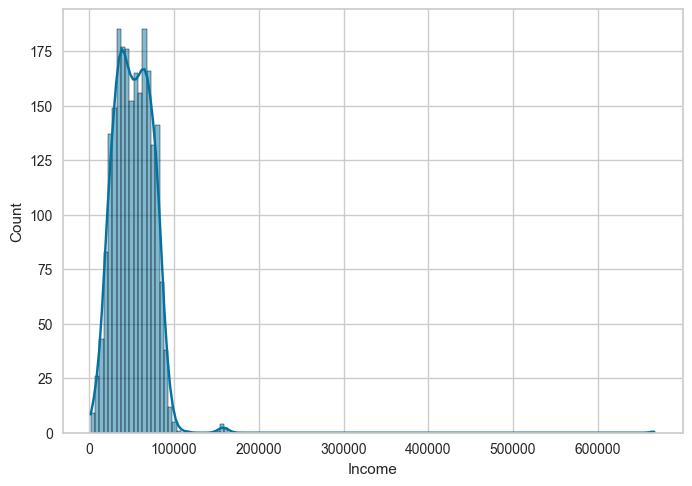

In [22]:
sns.histplot(raw_df[raw_df['Income'].notnull()]['Income'],
             kde=True)

In [23]:
raw_df['Income'].mean()

52247.25135379061

In [25]:
raw_df['Income'].median()

51381.5

In [26]:
from scipy.stats import normaltest

In [27]:
normaltest(raw_df[raw_df['Income'].notnull()]['Income'])

NormaltestResult(statistic=2943.373569541277, pvalue=0.0)

Yearly income data is not normally distributed, maybe because of the outliers

As seen earlier, the Income variable has 24 missing values
There are several ways to handle null-values :

* We can delete the entire column containing null-values
* We can delete the rows containing null-values
* We can impute the mean/median value
* We can input the mean/meadian value of a specific population
* We can use a model to predict missing values

We choose 

In [26]:
raw_df['Income']

ID        
1001  831     61074.0
1002  1132    60093.0
1005  301     79689.0
1006  1101    41021.0
1007  2888    57333.0
               ...   
9980  110     22010.0
9985  1920    38361.0
9986  2315    56628.0
9990  1903    75330.0
9997  1054    56243.0
Name: Income, Length: 2240, dtype: float64

In [28]:
Q1Yhi = raw_df['Income'].quantile(0.25)
Q3Yhi = raw_df['Income'].quantile(0.75)
IQRYhi = Q3Yhi - Q1Yhi
display(Q1Yhi,Q3Yhi,IQRYhi)

outliersYhi = raw_df[(raw_df['Income'] < Q1Yhi - 1.5 * IQRYhi) | (raw_df['Income'] > Q3Yhi + 1.5 * IQRYhi)]
outliersYhi

nonOutliersYhi = raw_df[~((raw_df['Income'] < Q1Yhi - 1.5 * IQRYhi) | (raw_df['Income'] > Q3Yhi + 1.5 * IQRYhi))]
nonOutliersYhi
display(outliersYhi,
        nonOutliersYhi)

35303.0

68522.0

33219.0

,,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Age
ID,,,,,,,,,,,,,,,,,,,,,,
1232,904,1232,1992.0,Graduation,157146.0,2022-04-29,13.0,2.0,2.0,1725.0,2.0,...,0.0,0.0,Male,8.497269e+10,2022.0,4.0,28.0,Together_0,Cash,32.0
4393,2117,4393,1987.0,Graduation,153924.0,2023-02-07,81.0,2.0,3.0,1.0,1.0,...,0.0,0.0,Other,8.425975e+10,2023.0,2.0,0.0,Divorced_0,Card,37.0
4416,2769,4416,1991.0,PhD,162397.0,2022-06-03,31.0,86.0,3.0,16.0,2.0,...,0.0,0.0,Female,8.442451e+10,2022.0,6.0,1.0,Together_2,Cash,33.0
6193,2749,6193,1991.0,PhD,156924.0,2022-08-29,85.0,3.0,3.0,2.0,1.0,...,0.0,0.0,Other,8.441136e+10,2022.0,8.0,0.0,Married_0,Online,33.0
6709,1322,6709,1984.0,Graduation,666666.0,2022-06-02,23.0,10.0,16.0,18.0,8.0,...,0.0,0.0,Male,8.407887e+10,2022.0,6.0,11.0,Together_1,Card,40.0
8473,170,8473,1987.0,PhD,160803.0,2021-08-04,21.0,56.0,18.0,1622.0,17.0,...,0.0,0.0,Other,8.414525e+10,2021.0,8.0,44.0,Married_0,Online,37.0
8811,773,8811,1990.0,PhD,157243.0,2023-03-01,98.0,21.0,4.0,1582.0,1.0,...,0.0,0.0,Male,8.475831e+10,2023.0,3.0,37.0,Married_1,Card,34.0
9331,139,9331,1987.0,Master,157733.0,2022-06-04,37.0,40.0,3.0,9.0,2.0,...,0.0,0.0,Female,8.429893e+10,2022.0,6.0,2.0,Together_1,Online,37.0


,,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Age
ID,,,,,,,,,,,,,,,,,,,,,,
1001,831,1001,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,0.0,0.0,Other,8.412036e+10,2021.0,8.0,31.0,Married_1,Card,30.0
1002,1132,1002,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,0.0,0.0,Male,8.494833e+10,2022.0,6.0,21.0,Married_1,Mobile,35.0
1005,301,1005,1978.0,2n Cycle,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,0.0,0.0,Female,8.444028e+10,2022.0,5.0,27.0,Single_0,Online,46.0
1006,1101,1006,1987.0,Master,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,...,0.0,0.0,Female,8.494006e+10,2021.0,12.0,7.0,Together_1,Online,37.0
1007,2888,1007,1996.0,PhD,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,...,0.0,0.0,Male,8.433939e+10,2021.0,9.0,33.0,Divorced_1,Card,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,110,9980,1992.0,Graduation,22010.0,2022-06-30,51.0,12.0,4.0,9.0,3.0,...,0.0,0.0,Male,8.464713e+10,2022.0,6.0,7.0,Together_1,Online,32.0
9985,1920,9985,1986.0,Graduation,38361.0,2022-12-27,74.0,40.0,2.0,56.0,20.0,...,0.0,0.0,Female,8.447441e+10,2022.0,12.0,10.0,Together_1,Cash,38.0
9986,2315,9986,1990.0,Graduation,56628.0,2023-03-21,30.0,480.0,7.0,82.0,7.0,...,0.0,0.0,Male,8.489301e+10,2023.0,3.0,20.0,Single_1,Mobile,34.0


We can try to define and take out the outliers

<Axes: xlabel='Income', ylabel='Count'>

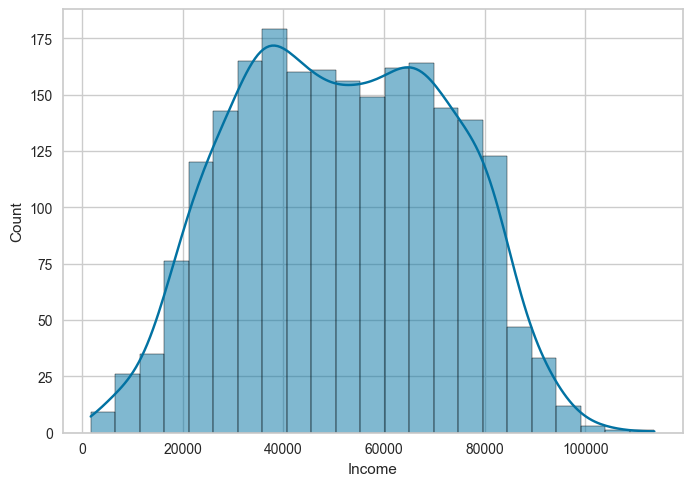

In [30]:
sns.histplot(nonOutliersYhi[nonOutliersYhi['Income'].notnull()]['Income'],
             kde=True)

In [31]:
nonOutliersYhi['Income'].mean()

51633.63813405797

In [32]:
nonOutliersYhi['Income'].median()

51301.0

In [33]:
normaltest(nonOutliersYhi[nonOutliersYhi['Income'].notnull()]['Income'])

NormaltestResult(statistic=231.54588203992873, pvalue=5.2535220730746056e-51)

Finally we get the non-Outliers data. As we can see here, the data looks like a bell shape but has two mountains.

The Mean and Median values are also quite similar. But, when we do normal test, it says that it's not a normally distributed data.

### Fill with Median (Per Education) Income

We can fill missing values in Yearly Income by using Median Income per Education Because income usually have correlation to education.

In [34]:
np.sort(raw_df['Academic_Level'].unique())
raw_df['Academic_Level'].value_counts().sort_index().values
raw_df['Academic_Level'].value_counts().sort_index()

Academic_Level
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: count, dtype: int64

In [35]:
raw_df.loc[(raw_df['Income'].isna()) & (raw_df['Academic_Level'] == 'Graduation'), 'Income']
raw_df[raw_df['Academic_Level'] == 'Graduation']['Income'].median()

52028.5

In [36]:
for i in raw_df['Academic_Level'].unique() :
    raw_df.loc[(raw_df['Income'].isna()) & (raw_df['Academic_Level'] == i), 'Income'] = raw_df[raw_df['Academic_Level'] == i]['Income'].median()
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2240 entries, (1001, 831) to (9997, 1054)
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2240 non-null   int64         
 1   Year_Of_Birth          2240 non-null   float64       
 2   Academic_Level         2240 non-null   object        
 3   Income                 2240 non-null   float64       
 4   Registration_Time      2240 non-null   datetime64[ns]
 5   Recency                2240 non-null   float64       
 6   Liquor                 2240 non-null   float64       
 7   Vegetables             2240 non-null   float64       
 8   Pork                   2240 non-null   float64       
 9   Seafood                2240 non-null   float64       
 10  Candy                  2240 non-null   float64       
 11  Jewellery              2240 non-null   float64       
 12  Num_Deals_Purchases    2240 non-null   float

In [37]:
# Check null dataframe after cleaning
value_check_and_sort(raw_df)

,Count,Unique,Null,%Null,DType
ID,2240,2240,0,0.00%,int64
Living_With,2240,23,0,0.00%,object
Total_Purchase,2240,39,0,0.00%,float64
Month_Register,2240,12,0,0.00%,float64
Year_Register,2240,3,0,0.00%,float64
Phone,2240,2240,0,0.00%,float64
Gender,2240,3,0,0.00%,object
Complain,2240,2,0,0.00%,float64
Promo_20,2240,2,0,0.00%,float64
Promo_10,2240,2,0,0.00%,float64


### 3.3 Logical Checking

Although the dataframe is now cleaned from null values, we cannot be certain that no erroneous values have been "secretly" assigned to the dataset. Therefore, I will check the logical consistency of the data columns to ensure correctness before proceeding to the outlier preprocessing stage.

In [38]:
df1 = raw_df.copy()

In [39]:
# Grouping values and check
df1['Academic_Level'] = df1['Academic_Level'].replace('2n Cycle', 'Master')
df1['Academic_Level'].value_counts()

Academic_Level
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64

Second. In the Living_With column, marital status and number of children are combined, so we will separate them into a column Status for marital status and Children for the number of children.

In [40]:
# Seperating and removing the non-using columns
df1[['Status', 'Children']] = df1['Living_With'].str.split('_', expand=True)
df1.drop(columns=['Living_With'], inplace=True)

After that, we redefine the "Status" into 5 states: 'Married', 'Together', 'Single' (Single & Alone), 'Divorced', 'Widow'.

In [46]:
# Removing rows with 'Status' as 'YOLO' or 'Absurd'
df1 = df1[~df1['Status'].isin(['YOLO', 'Absurd'])]
# Merging 'Single' and 'Alone' into 'Single'
df1['Status'] = df1['Status'].replace('Alone', 'Single')

In [47]:
df1['Status'].value_counts()

Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: count, dtype: int64

In [43]:
df1['Children'].value_counts()

Children
1    1126
0     636
2     421
3      53
Name: count, dtype: int64

Lastly, I noticed that in the promotion-related categorical variables, some data rows contain the value "-1" even though the data type of the column is boolean. Therefore, we will check which columns contain this value.

In [48]:
# Check which columns contain the value "-1"
cols_with_strange_value = df1.columns[df1.isin([-1]).any()].tolist()
print(f'Columns containing "-1" value: {cols_with_strange_value}.')

Columns containing "-1" value: ['Promo_40'].


In [49]:
df1['Promo_40'].value_counts()

Promo_40
-1.0    1495
 0.0     678
 1.0      63
Name: count, dtype: int64

And because the number of "-1" values in this column is too high compared to the total number of rows, combined with the fact that when comparing correlation heatmaps, this column does not show strong correlations with any other columns. Therefore, I have decided to drop this column.

In [50]:
# Replace the column with too many strange values
df1.drop(columns=['Promo_40'], inplace=True)

Now the data may seem ready, we're going to visualizing it before doing the Outliers processes.

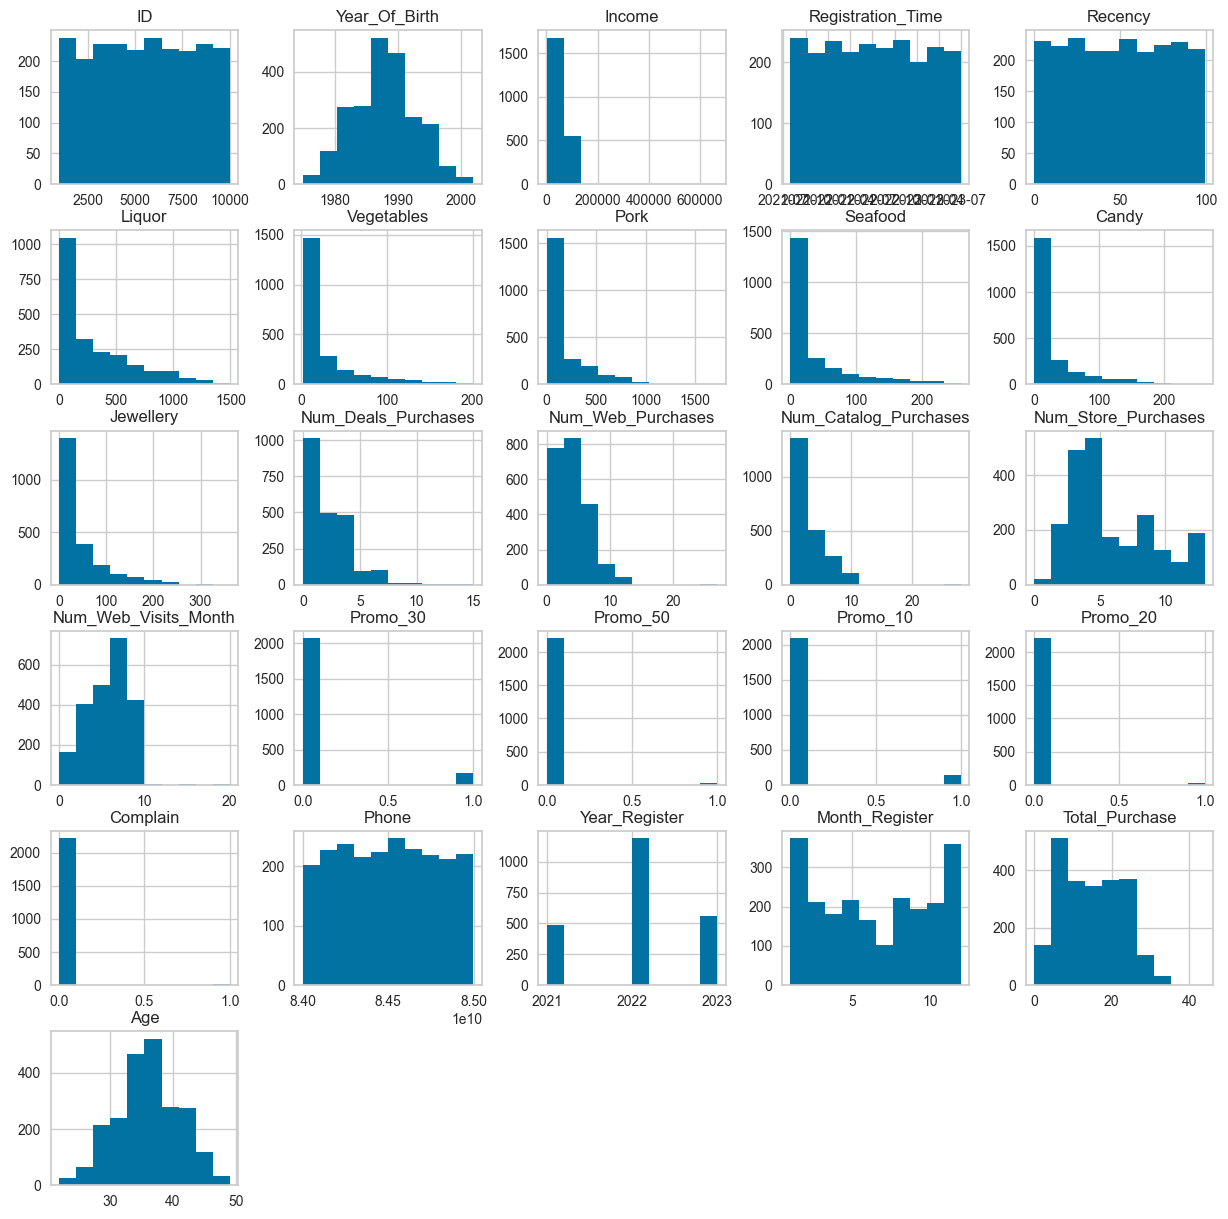

In [51]:
df1.hist(figsize=(15, 15))
plt.show()

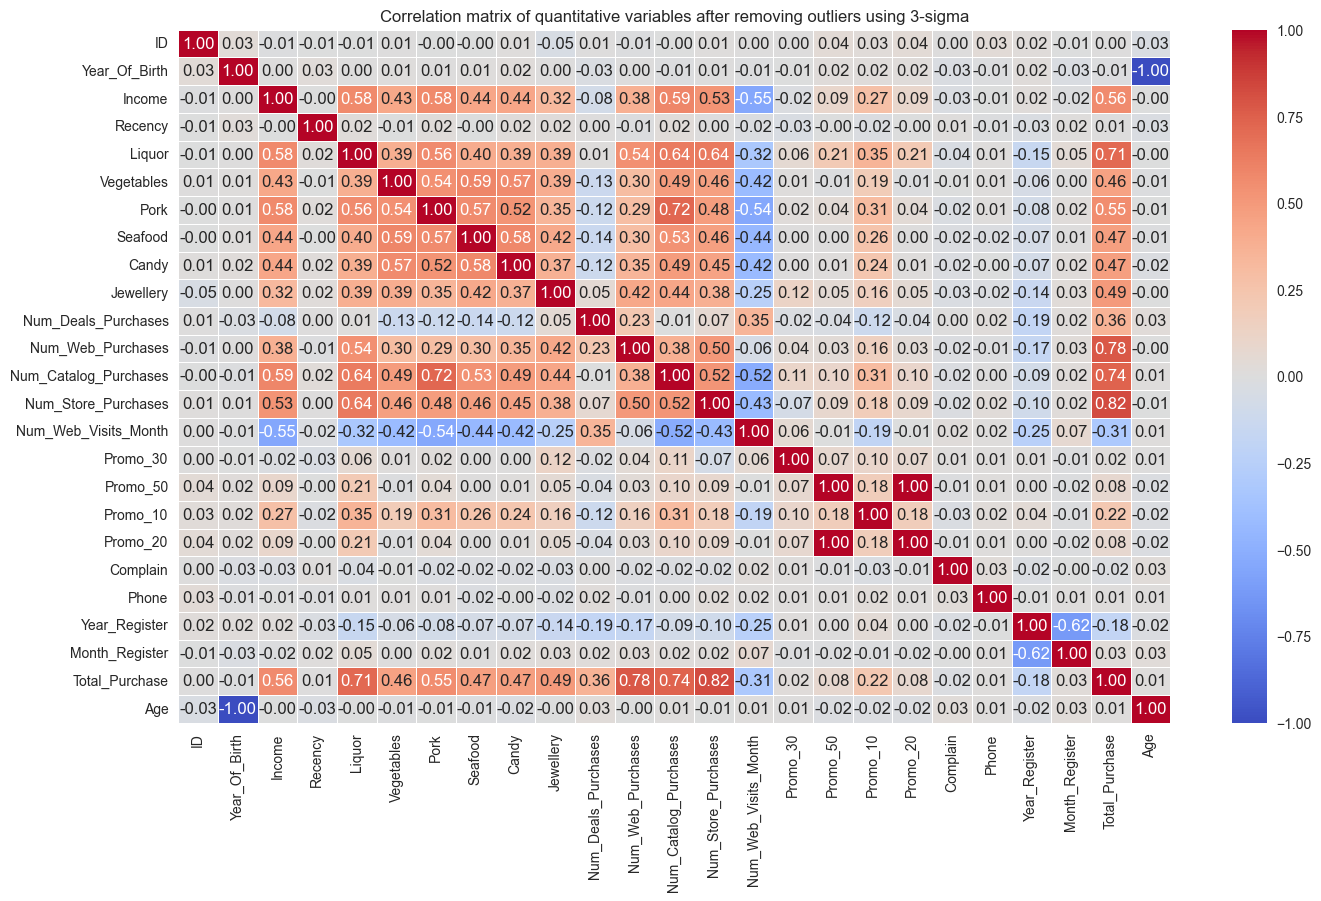

In [60]:
# Check numeric columns after removing outliers using 3-sigma
new_num_col_lst = list(df1.select_dtypes(include='number').columns)
test_numeric_data = df1[new_num_col_lst]

# Perform heatmap to check correlation
correlation_matrix = test_numeric_data.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation matrix of quantitative variables after removing outliers using 3-sigma')
plt.show()

In [62]:
df1.to_csv('cleaning_data.csv', index=False)